In [169]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

MAP_SIZE = (100,100)
# an empty density map
map = np.zeros(MAP_SIZE)

def plot_map(map, title=None):
    cax = plt.matshow(map)
    plt.colorbar(cax)
    if title is not None:
        plt.title(title)
    plt.show()

plot_map(map,"une map vide")

# 1) Generez et affichez une distribution uniforme de loups sur la carte

- Si une zone (case) a une chance sur 2 d'avoir un loup

In [88]:
map = np.random.uniform(0, 1, map.shape)

In [89]:
plot_map(map,"une map avec une chance sur 2 d'avoir un loup")

In [90]:
print('Moyenne: ', map.mean()) #0.5 expected

Moyenne:  0.4930528477151427


- Si une case a une chance sur 5 d'avoir un loup

In [162]:
map = np.random.uniform(0, 5, map.shape)

In [163]:
map[(map < 4)] = 0

In [164]:
map[(map >= 4)] = 1

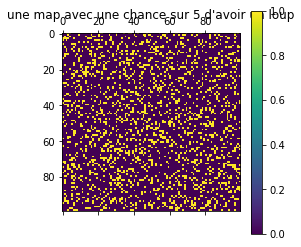

In [165]:
plot_map(map,"une map avec une chance sur 5 d'avoir un loup")

In [167]:
print('Moyenne: ', map.mean()) #0.2 expected

Moyenne:  0.2053


In [171]:
# map = np.random.randint(5, size=MAP_SIZE)
# plot_map(map==4)

- Si une case a une chance sur 3 d'avoir un loup et 1 sur 3 d'avoir 2 loups

In [193]:
map = np.random.randint(3, size=map.shape)

In [195]:
plot_map(map,"une map avec une chance sur 3 d'avoir un loup et 1 sur 3 d'avoir 2 loups")

In [201]:
# 33% 0, 33% 1, 33% 2
zero = (map==0)
print(zero.mean())

un = (map==1)
print(un.mean())

deux = (map==2)
print(deux.mean())

0.3342
0.3347
0.3311


In [202]:
map.mean()

0.9969

- utilisez des statistiques descriptives pour vérifier que vos probabilités sont bonnes

# 2) Generez et affichez une distribution gaussienne de loup sur la carte

- On a introduit 1000 loups sur une zone de taille (100,100) vide. Il y a un point d'eau au milieu de la carte, en (50,50). On suppose que les loups doivent regulierement aller s'hydrater, et ont donc tendance à rester plus pres de l'eau. Pour cela, on choisi de représenter leur répartition par une distribution gaussienne centrée sur le point d'eau. 

Vous pouvez utiliser pour cela np.random.multivariate_normal

In [228]:
mean = [50,50]
cov = [[50, 0], [0, 50]]

In [247]:
x, y = np.random.multivariate_normal(mean, cov, map.shape).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

In [244]:
np.random.multivariate_normal(mean, cov, map.shape).T

array([[[60.50791591, 52.55046196, 54.74627188, ..., 55.3257457 ,
         38.70960766, 53.98406896],
        [62.89624404, 50.1480397 , 57.02411724, ..., 51.02624716,
         51.08914271, 56.13754429],
        [48.89759368, 42.86172583, 62.02811314, ..., 51.12925647,
         48.5989319 , 54.50510812],
        ...,
        [61.22185865, 46.41006802, 46.4058588 , ..., 50.30459682,
         59.41450569, 65.0749707 ],
        [52.49278342, 61.52104571, 37.77693941, ..., 42.38494946,
         62.18065555, 44.44531749],
        [55.09221008, 50.21645932, 48.9473014 , ..., 54.4077128 ,
         53.05964195, 47.46410809]],

       [[61.66181339, 60.41193916, 39.18899395, ..., 53.38891788,
         51.87324571, 64.62200144],
        [57.16649607, 56.39934147, 43.1535721 , ..., 45.69799424,
         43.21271533, 50.16306737],
        [35.63922613, 53.39564687, 52.00588503, ..., 47.02611577,
         47.53685159, 43.21945755],
        ...,
        [55.1798359 , 63.50402158, 49.89297194, ..., 4

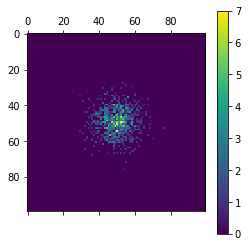

In [219]:
map = np.zeros(MAP_SIZE)
pos = np.random.multivariate_normal(mean=(50,50), cov=((50,0),(0,50)), size=1000)
for x,y in pos:
    map[int(x), int(y)] +=1
plot_map(map)

- utilisez des statistiques descriptives pour vérifier que vos probabilités sont bonnes

# 4) Un modèle dynamique

Simulez une année du scénario suivant :

On introduit aléatoirement de manière uniforme 10 000 moutons et 1000 loups sur la carte. 
Chaque mois :
- le nombre de moutons augmente de 10% sur chaque case
- chaque loup mange un mouton sur sa case. S'il n'y a pas assez de moutons, les loups se partagent les moutons existants s'il y en a ou meurent de faim s'il n'y en a plus.
- Si au début du mois n'y a plus de moutons sur la case, tout les loups de la case meurent.
- 20% des moutons mangés donnent des loups supplémentaires

- jouez sur les coefficients et les equations pour que les populations ne disparaissent pas